# ***Installing Package***

In [3]:
#we first import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# ***Uploading the data set***

In [4]:
#we now download and uplaod the data set

ds_egssd = pd.read_csv('/content/drive/MyDrive/ML Project.csv')



# ***Viewing and Analysing the Data set***

In [5]:
#Viewing data
#now we can print the head and tails (first and last five)of the data sets
ds_egssd.head()
ds_egssd.tail()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


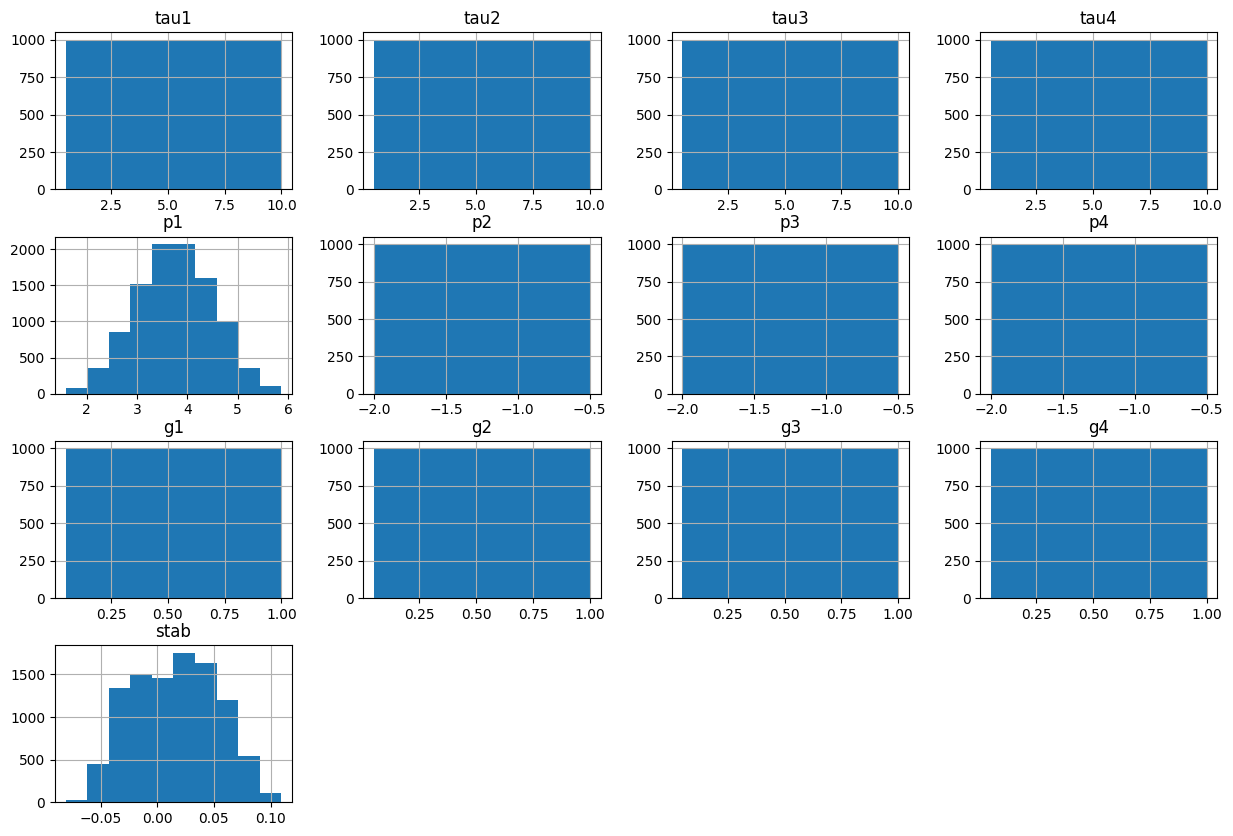

In [6]:
#These are the information of the given data set
ds_egssd.info()
ds_egssd.describe()
ds_egssd.hist(bins=10, figsize=(15,10))
plt.show()

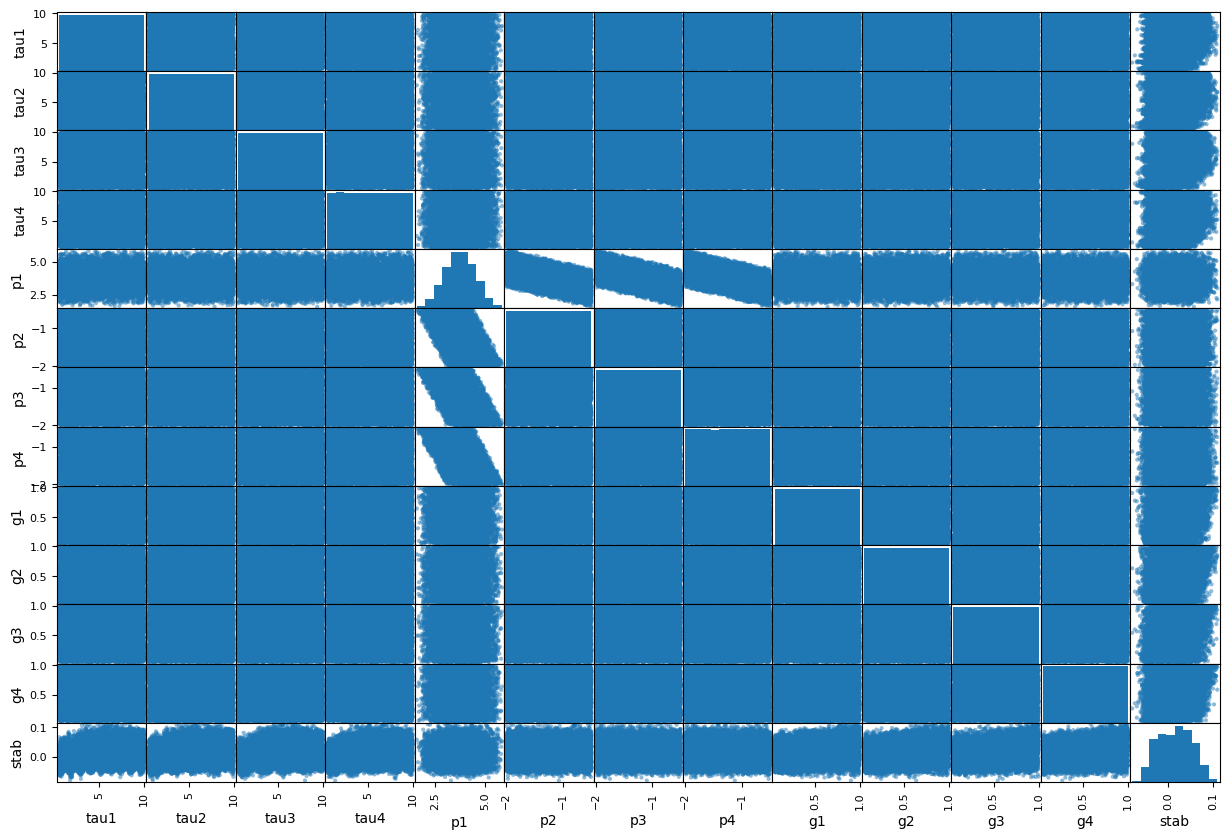

In [7]:
#since there are no namless values or missing values
#lets us start by visualising the data
pd.plotting.scatter_matrix(ds_egssd, figsize=(15, 10))
plt.show()

In [8]:
#The data set ds+egssd has no missing values or duplicate rows / columns (given from the site where data set was downloaded)

# ***Giving values for x and y variables***

In [9]:
#Giving values for the x set
x=ds_egssd.drop(columns=["stab","stabf"])
x.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [10]:
#Now we assign values for y (we first conver the strings in stabf to numbers and then assign value of y)
#one error i personally made is added multiples col to the table named: num, new_AS and stabf but all contain the same information
#the new col that has the string convereted to numbers is called 'num'

le=LabelEncoder()
y=le.fit_transform(ds_egssd["stabf"])

print(y)
print(type(y))

print(le.classes_)



[1 0 1 ... 0 1 1]
<class 'numpy.ndarray'>
['stable' 'unstable']


# ***Splitting Training and Testing sets (Raw)***

In [11]:
# We now split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state=42)

In [12]:
#Printing values of x train and y train
x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)


x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)
print(x_train)
print(y_train)
print(type(y_train))

          tau1      tau2      tau3      tau4        p1        p2        p3  \
1249  3.507015  7.153356  4.613492  4.316704  3.805283 -1.843323 -0.769643   
8936  4.382909  9.456287  0.796901  3.470452  4.253830 -1.636117 -1.681423   
4604  5.735298  2.742411  2.265467  0.609000  3.917089 -1.348753 -1.395325   
3168  8.804876  3.358790  4.648564  9.534413  4.626540 -1.982996 -1.594497   
4463  9.632859  0.878894  6.916970  5.203109  3.068386 -1.297168 -1.112700   
...        ...       ...       ...       ...       ...       ...       ...   
4145  3.611261  2.823969  6.443583  5.580119  5.415726 -1.691441 -1.771056   
8301  5.885405  9.989265  8.790848  2.001724  3.995171 -1.952787 -1.468542   
2881  4.760597  2.968432  2.379881  4.834267  3.551370 -0.614905 -1.270966   
7655  3.137950  1.954118  3.652218  1.428319  4.200709 -1.020833 -1.633180   
5181  9.225039  9.204239  5.931763  0.589579  2.629912 -1.131719 -0.993128   

            p4        g1        g2        g3        g4  
1249 -

# ***Splitting Training and Testing sets (std)***

In [13]:
#Standardizing the data (TO RE TYPE)
from sklearn.preprocessing import StandardScaler

std_sc=StandardScaler()
std_sc.fit(x_train)
Stand_x=pd.DataFrame(std_sc.fit_transform(x))

x_train_sc=std_sc.fit_transform(x_train)
x_test_sc=std_sc.fit_transform(x_test)
print(x_train_sc)
print(x_test_sc)

[[-0.6360014   0.69869998 -0.23314488 ...  0.06651508  0.8069309
  -0.05099622]
 [-0.31745834  1.53777113 -1.6267494  ... -1.23509317  0.17016247
   0.61398951]
 [ 0.17437473 -0.908424   -1.09051159 ...  0.7006983  -0.571096
   0.02407477]
 ...
 [-0.1801019  -0.82607332 -1.04873409 ...  0.3028934  -0.51797017
  -1.10320546]
 [-0.77022176 -1.19563768 -0.5841481  ...  0.48206262 -0.39474414
   0.62744146]
 [ 1.44351439  1.44593763  0.24821347 ...  0.75659962 -0.12234976
  -1.34432939]]
[[-1.39848253 -0.78191322  0.77241917 ...  0.47765666 -0.82186404
   1.64131693]
 [-0.81899668 -0.63206527  1.08175041 ... -0.0921471   0.92995805
   1.47766823]
 [ 0.18140288 -0.16491276 -0.21908951 ...  1.4032051   0.97293921
   0.94063719]
 ...
 [-1.1621445  -1.55638596  1.37680277 ... -1.67624622  1.33027414
   0.12422975]
 [-0.30192453  0.07857389  0.38933415 ... -1.34145108 -0.1158155
   0.60773853]
 [-0.60610829  0.22135655  1.49782505 ... -1.45099542 -0.41872179
   0.92214842]]


# ***Splitting Training and Testing sets (PCA)***

In [14]:
# Reducing the dimension of the Data
#here we have reduced the dimension from 12 , 50% of 12 =6
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(x_train_sc)
x_train_pca=pca.transform(x_train_sc)
x_test_pca=pca.transform(x_test_sc)
print(x_train_pca)
print(x_test_pca)


[[ 0.04217217 -0.41796792  0.01021593 -0.44880945 -0.20857538 -0.2165256 ]
 [ 0.80639574  1.14643333  0.21573618 -0.48850767 -1.24734899 -0.24704269]
 [ 0.30457272  0.38879259  1.65706422  0.22872892 -1.00208119 -0.7589246 ]
 ...
 [-0.3654981   0.37947731  0.34794171 -0.03306374  1.7067046  -1.41688309]
 [ 0.81661173  1.85788541  0.78110027 -0.89905027  0.83968522 -0.36741024]
 [-2.01500309 -1.92587181  0.54372752 -1.14754872 -1.96933716 -1.03941313]]
[[ 0.85067624 -0.24588232  0.12403983  2.21308609  0.80010768  1.96012816]
 [-0.5278673   1.56544167 -1.53128582  0.09078164 -0.14561196  1.02269613]
 [ 0.00929269 -0.86469874  0.32417196  0.30554649 -0.26663859  2.00835166]
 ...
 [ 0.90225201  0.97391209 -0.91376734  1.91881644 -0.55010504  0.53690835]
 [-0.94417373  0.53874569 -0.57093029  0.30428272  0.61079169  0.50357205]
 [-1.29305266  0.80475115 -1.23394453  0.84800163  0.15879701  1.55192217]]



# ***Visulalzation of Data***

(10000, 12)


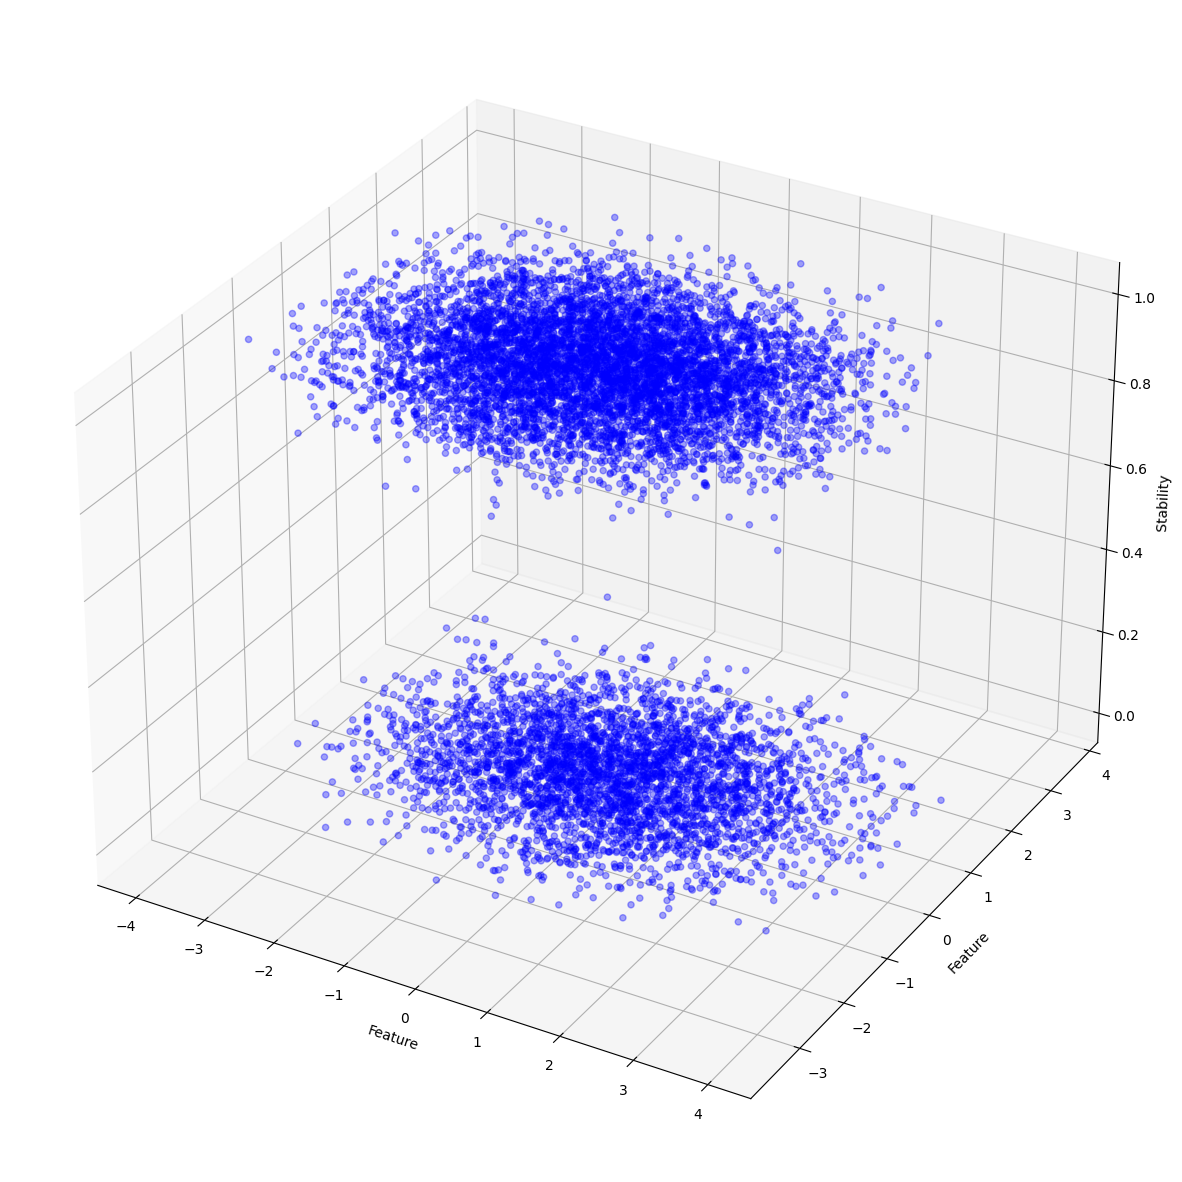

In [110]:
from sklearn.decomposition import PCA
pca2=PCA(n_components=2)
X_2D_pca=pca2.fit_transform(Stand_x)
print(Stand_x.shape)


from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,20))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_2D_pca[:,0],X_2D_pca[:,1],y,alpha=0.35,c='b')


ax.set_xlabel("Feature")
ax.set_ylabel("Feature")
ax.set_zlabel("Stability ")
plt.show()




All models will be trained with standard testing and training sets

# ***Logistic Regression***

In [16]:
#Start using Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_class=LogisticRegression()
lr_class.fit(x_train,y_train)


LogisticRegression()

In [17]:
#We use the LR fucntion and fit the model and train it to predict values

lr_class=LogisticRegression()
lr_class.fit(x_train_sc,y_train)
pred_lr=lr_class.predict(x_test_sc)
print("The predicted values : ",pred_lr)

The predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [18]:
lr_accu=lr_class.score(x_test_sc,y_test)
print("The Accuray of Logistic regression :" ,lr_accu)

The Accuray of Logistic regression : 0.8168


In [19]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for Logistic Regression: %.3f' %precision_score(y_true=y_test,y_pred=pred_lr))
print('Recall score for Logistic Regression : %.3f' %recall_score(y_true=y_test,y_pred=pred_lr))
print('F1 Score for Logistic Regression  : %.3f' %f1_score(y_true=y_test,y_pred=pred_lr))
f1_1=(f1_score(y_true=y_test,y_pred=pred_lr)).round(3)



Precision score for Logistic Regression: 0.839
Recall score for Logistic Regression : 0.882
F1 Score for Logistic Regression  : 0.860


 Report for  LogisticRegression():
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       905
           1       0.84      0.88      0.86      1595

    accuracy                           0.82      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.81      0.82      0.81      2500
  



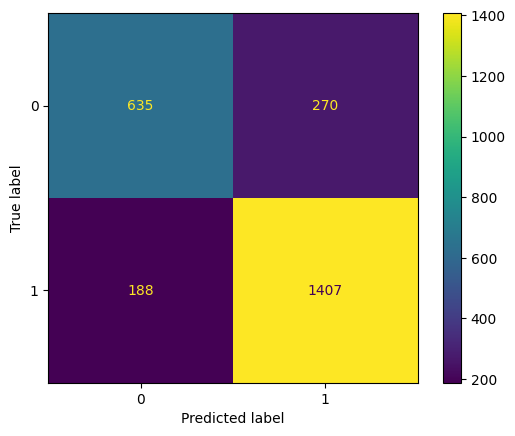

In [20]:
#confusion matric for logistic regression
from sklearn import datasets, svm , metrics

lr_class=LogisticRegression()
lr_class.fit(x_train_sc,y_train)
pred_lr=lr_class.predict(x_test_sc)
print(" Report for  %s:\n%s  \n"
      % (lr_class, metrics.classification_report(y_test, pred_lr)))
cofmat=confusion_matrix(y_true= y_test, y_pred=pred_lr)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

Cross Validation 5 parts


In [21]:
from sklearn.model_selection import cross_val_score

lr_cv=cross_val_score(lr_class,x_train_sc,y_train,cv=5,scoring='f1_weighted')
lr_cv=(str(lr_cv.mean().round(5)) + ' +/ -' +str(lr_cv.std().round(5)))
print(lr_cv)

0.81184 +/ -0.00598


# ***SVM -Support Vector Machine***

In [22]:
#SVM -support vectore machine
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm , metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

s_c=StandardScaler()
s_c.fit(x_train)
train_size=x.astype(np.float64)
train_test_split=train_test_split(ds_egssd,test_size=0.25,random_state=1)



# ***SVM - rbf***

# ***Hyperparameter tuning for SVM***

In [23]:
hp_svm=SVC(kernel='rbf')
hp_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
# We will now find the values of c and gamma
#currently we are using grid search
hp_grid =[
    {
        'C': [i for i in range(1, 10)],
        'gamma': np.linspace(0.1, 1,10 )
    }
]

hp_grid

[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]

In [25]:
from sklearn.model_selection import GridSearchCV

gr_sc=GridSearchCV(estimator=hp_svm,param_grid=hp_grid,cv=5)
gr_sc.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}])

In [26]:
print(gr_sc.best_params_)
print(gr_sc.best_score_)
print(gr_sc.best_estimator_)

{'C': 9, 'gamma': 0.1}
0.9596
SVC(C=9, gamma=0.1)


In [27]:
classi = SVC(kernel='rbf', random_state=42, C=9, gamma=0.1)
classi.fit(x_train_sc, y_train)  # Train the model
from sklearn import datasets, svm , metrics
#The score of accuracy of model
print("The Accuray of SVM RBF model : ",classi.score(x_test_sc,y_test))
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

kernerlsvm=SVC(kernel='rbf')
kernerlsvm.fit(x_train_sc ,y_train)
prediction=kernerlsvm.predict(x_test_sc)



print('Precision score for SVM rbf: %.3f' %precision_score(y_true=y_test,y_pred=prediction))
print('Recall score for SVM rbf : %.3f' %recall_score(y_true=y_test,y_pred=prediction))
print('F1 Score for SVM rbf   : %.3f' %f1_score(y_true=y_test,y_pred=prediction))
f1_2=(f1_score(y_true=y_test,y_pred=prediction)).round(3)


The Accuray of SVM RBF model :  0.9664
Precision score for SVM rbf: 0.961
Recall score for SVM rbf : 0.971
F1 Score for SVM rbf   : 0.966


In [28]:
cv_res=gr_sc.cv_results_
for i in cv_res:
  print(i)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_C
param_gamma
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [29]:
for mean_score,std_score,rank_score in zip(cv_res['mean_test_score'],cv_res['std_test_score'],cv_res['rank_test_score']):
  print(mean_score,std_score,rank_score)

0.9492 0.005222174940684305 9
0.9430666666666667 0.005105117258420431 18
0.9282666666666666 0.004706496691926057 27
0.9125333333333334 0.006564551266715308 36
0.8942666666666668 0.011734848387033654 45
0.8646666666666667 0.012592766883325423 54
0.8253333333333334 0.011147495981908527 63
0.7746666666666667 0.010039920318408889 72
0.7149333333333334 0.00505261208573238 81
0.6713333333333333 0.004279148409568323 90
0.9557333333333332 0.00638887922704584 8
0.9454666666666667 0.003941798799758515 17
0.9317333333333334 0.0027840817357094915 19
0.9179999999999999 0.004917090377222895 35
0.9032 0.007499925925560119 44
0.8798666666666666 0.011786244336325108 46
0.8445333333333334 0.010694962469416258 55
0.8038666666666667 0.011965877411298443 64
0.7514666666666667 0.00846850373770691 73
0.7091999999999999 0.00640000000000003 82
0.9582666666666666 0.005821034654118157 5
0.9457333333333334 0.0029393876913398165 15
0.9306666666666666 0.003265986323710925 25
0.9181333333333332 0.005289822513300664 

In [30]:
#Now we will try random search
hp_ran={
    'C': [i for i in range(1,10)],
    'gamma':np.linspace(0.1,1,10)
}

hp_ran

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
ran_sc=RandomizedSearchCV(estimator=hp_svm,param_distributions=hp_ran,cv=5)
ran_sc.fit(x_train_sc,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [32]:
print(ran_sc.best_params_)
print(ran_sc.best_score_)
print(ran_sc.best_estimator_)
best_model=(ran_sc.best_estimator_)
predic_svmrbf=best_model.predict(x_test_sc)
print(predic_svmrbf)
test_acc=accuracy_score(y_test,predic_svmrbf)
print(test_acc)

{'gamma': 0.1, 'C': 3}
0.9582666666666666
SVC(C=3, gamma=0.1)
[1. 1. 1. ... 1. 1. 1.]
0.9624


In [33]:
classi = SVC(kernel='rbf', random_state=42, C=2, gamma=0.2)
classi.fit(x_train_sc, y_train)  # Train the model

from sklearn import datasets, svm , metrics
#The score of accuracy of model
print("The Accuray of SVM RBF model : ",classi.score(x_test_sc,y_test))
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

kernerlsvm=SVC(kernel='rbf')
kernerlsvm.fit(x_train_sc ,y_train)
prediction=kernerlsvm.predict(x_test_sc)



print('Precision score for SVM rbf: %.3f' %precision_score(y_true=y_test,y_pred=prediction))
print('Recall score for SVM rbf : %.3f' %recall_score(y_true=y_test,y_pred=prediction))
print('F1 Score for SVM rbf   : %.3f' %f1_score(y_true=y_test,y_pred=prediction))
f1_2=(f1_score(y_true=y_test,y_pred=prediction)).round(3)

The Accuray of SVM RBF model :  0.9516
Precision score for SVM rbf: 0.961
Recall score for SVM rbf : 0.971
F1 Score for SVM rbf   : 0.966


In [34]:
from sklearn.model_selection import cross_val_score

svm_cv=cross_val_score(classi,x_train_sc,y_train,cv=5,scoring='f1_weighted')

svm_cv=((str(svm_cv.mean().round(5)) + ' +/- '+str(svm_cv.std().round(5))))
print(svm_cv)

0.94538 +/- 0.00402


Without tuning


In [35]:
from sklearn.model_selection import cross_val_score

# ... (rest of your code for training and scaling)

svm_cv = cross_val_score(classi, x_train_sc, y_train, cv=5, scoring='f1_weighted')

# Calculate and format mean and standard deviation
mean_score = svm_cv.mean().round(5)
std_score = svm_cv.std().round(5)
formatted_score = f"{mean_score} +/- {std_score}"

print(f"F1-weighted score (cross-validation): {formatted_score}")


F1-weighted score (cross-validation): 0.94538 +/- 0.00402


In [36]:
#SVM using kernel: RBF
# here we have nto used any hyperparamter tuning
classi = SVC(random_state=42)

classi.fit(x_train_sc, y_train)  # Train the model

SVC(random_state=42)

In [37]:
#now lets is perform predicition
y_ans=classi.predict(x_train_sc)
print("Predicted values :",y_ans)

# predicted an ans in x_test
y_ans=classi.predict(x_test_sc)
print("Predicted values :",y_ans)

Predicted values : [1. 0. 0. ... 0. 1. 1.]
Predicted values : [1. 1. 1. ... 1. 1. 1.]


In [38]:
from sklearn import datasets, svm , metrics
#The score of accuracy of model
print("The Accuray of SVM RBF model : ",classi.score(x_test_sc,y_test))



The Accuray of SVM RBF model :  0.9564


 Report for RBF SVC():
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       905
           1       0.96      0.97      0.97      1595

    accuracy                           0.96      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.96      0.96      0.96      2500




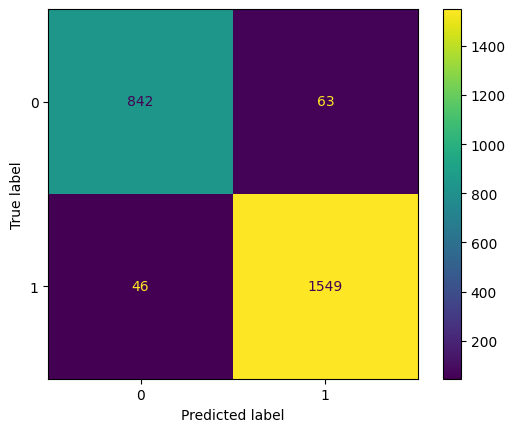

In [39]:
#confusion matrix for RBF
from sklearn.metrics import ConfusionMatrixDisplay

kernerlsvm=SVC(kernel='rbf')
kernerlsvm.fit(x_train_sc ,y_train)

prediction=kernerlsvm.predict(x_test_sc)
print(" Report for RBF %s:\n%s\n"
      % (kernerlsvm, metrics.classification_report(y_test, prediction)))

cofmat=confusion_matrix(y_true= y_test, y_pred=prediction)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

In [40]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for SVM rbf: %.3f' %precision_score(y_true=y_test,y_pred=prediction))
print('Recall score for SVM rbf : %.3f' %recall_score(y_true=y_test,y_pred=prediction))
print('F1 Score for SVM rbf   : %.3f' %f1_score(y_true=y_test,y_pred=prediction))
f1_2=(f1_score(y_true=y_test,y_pred=prediction)).round(3)


Precision score for SVM rbf: 0.961
Recall score for SVM rbf : 0.971
F1 Score for SVM rbf   : 0.966




# ***Decision Trees***



# ***Hyperparameter Tuning***

In [41]:
from sklearn.tree import DecisionTreeClassifier
hp_dt=DecisionTreeClassifier()
hp_dt.get_params()



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [42]:
dt_grid = [
    {
        'max_depth': [1, 100],
        'max_features': [1, 100],
        'max_leaf_nodes': [1, 100]
    }
]

dt_grid

[{'max_depth': [1, 100], 'max_features': [1, 100], 'max_leaf_nodes': [1, 100]}]

In [43]:
gd_dt=GridSearchCV(DecisionTreeClassifier(),param_grid=dt_grid,cv=5)
gd_dt.fit(x_train_sc,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validat

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 100], 'max_features': [1, 100],
                          'max_leaf_nodes': [1, 100]}])

In [44]:

print(gd_dt.best_score_)
print(gd_dt.best_estimator_)
print(gd_dt.best_params_)

0.8575999999999999
DecisionTreeClassifier(max_depth=100, max_features=100, max_leaf_nodes=100)
{'max_depth': 100, 'max_features': 100, 'max_leaf_nodes': 100}


In [45]:
cv_res=gd_dt.cv_results_
for i in cv_res:
  print(i)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_depth
param_max_features
param_max_leaf_nodes
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [46]:
for mean_score,std_score,rank_score in zip(cv_res['mean_test_score'],cv_res['std_test_score'],cv_res['rank_test_score']):
  print(mean_score,std_score,rank_score)


nan nan 5
0.6517333333333333 0.017041648329248482 4
nan nan 5
0.6709333333333334 0.007666376806114714 3
nan nan 5
0.7157333333333333 0.01944382221226636 2
nan nan 5
0.8575999999999999 0.006884443009826956 1


In [47]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

dt_class=DecisionTreeClassifier(max_depth=100, max_features=100, max_leaf_nodes=100,criterion='gini')
dt_class.fit(x_train_sc,y_train)
predic_dt=dt_class.predict(x_test_sc)
dt_score=dt_class.score(x_test_sc,y_test)
print("The accuray of decision tree without fixing max_depth : ",dt_score)
print("Predicted Values : ",predic_dt)

The accuray of decision tree without fixing max_depth :  0.8656
Predicted Values :  [1. 1. 1. ... 1. 1. 1.]


In [48]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for Decision Tree : %.3f' %precision_score(y_true=y_test,y_pred=predic_dt))
print('Recall score for Decision Tree : %.3f' %recall_score(y_true=y_test,y_pred=predic_dt))
print('F1 Score for Decision Tree : %.3f' %f1_score(y_true=y_test,y_pred=predic_dt))
f1_5=(f1_score(y_true=y_test,y_pred=predic_dt)).round(3)


Precision score for Decision Tree : 0.892
Recall score for Decision Tree : 0.898
F1 Score for Decision Tree : 0.895


 Report for  DecisionTreeClassifier(max_depth=100, max_features=100, max_leaf_nodes=100):
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       905
           1       0.89      0.90      0.90      1595

    accuracy                           0.87      2500
   macro avg       0.86      0.85      0.85      2500
weighted avg       0.87      0.87      0.87      2500




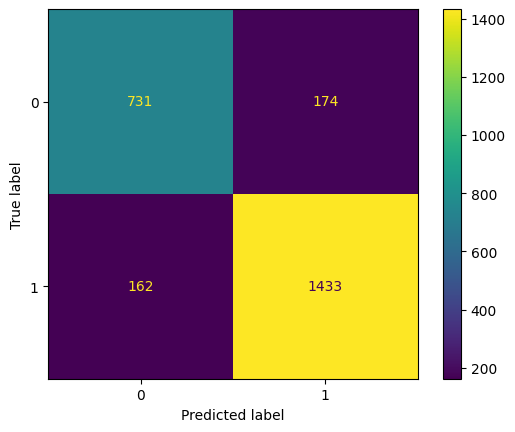

In [49]:
#confusion for decision tree
print(" Report for  %s:\n%s\n"
      % (dt_class, metrics.classification_report(y_test, predic_dt)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_dt)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score

dt_cv=cross_val_score(dt_class,x_train_sc,y_train,cv=5,scoring='f1_weighted')

dt_cv=((str(dt_cv.mean().round(5)) + ' +/- '+str(dt_cv.std().round(5))))
print(dt_cv)

0.85765 +/- 0.00625


#***Random Forest***

#***Hyperparameter Tuning***

In [51]:
from sklearn.ensemble import RandomForestClassifier

hprf=RandomForestClassifier()
hprf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
rf_grid=[
    {
        'max_depth':[1,100],
        'max_leaf_nodes':[1,100],
        'n_estimators':[1,100]
        }
]
rf_grid

[{'max_depth': [1, 100], 'max_leaf_nodes': [1, 100], 'n_estimators': [1, 100]}]

In [53]:
grid_rf=GridSearchCV(RandomForestClassifier(),param_grid=rf_grid,cv=5)
grid_rf.fit(x_train_sc,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 100], 'max_leaf_nodes': [1, 100],
                          'n_estimators': [1, 100]}])

In [54]:
print(grid_rf.best_estimator_)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

RandomForestClassifier(max_depth=100, max_leaf_nodes=100)
{'max_depth': 100, 'max_leaf_nodes': 100, 'n_estimators': 100}
0.8993333333333332


In [55]:
#Random Forest
rf_class=RandomForestClassifier(max_depth=100, max_leaf_nodes=100,n_estimators=100)
rf_class.fit(x_train_sc,y_train)
predic_rf=rf_class.predict(x_test_sc)
rf_accu=rf_class.score(x_test_sc,y_test)
print("The accuray of Random forest without fixing max_depth: ",rf_accu)
print("predicted values : ", predic_rf)


The accuray of Random forest without fixing max_depth:  0.9096
predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [56]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for Random forest : %.3f' %precision_score(y_true=y_test,y_pred=predic_rf))
print('Recall score for Random forest : %.3f' %recall_score(y_true=y_test,y_pred=predic_rf))
print('F1 Score for Random forest : %.3f' %f1_score(y_true=y_test,y_pred=predic_rf))
f1_6=(f1_score(y_true=y_test,y_pred=predic_rf)).round(3)

Precision score for Random forest : 0.901
Recall score for Random forest : 0.965
F1 Score for Random forest : 0.932


 Report for  RandomForestClassifier(max_depth=100, max_leaf_nodes=100) : 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       905
           1       0.90      0.96      0.93      1595

    accuracy                           0.91      2500
   macro avg       0.91      0.89      0.90      2500
weighted avg       0.91      0.91      0.91      2500




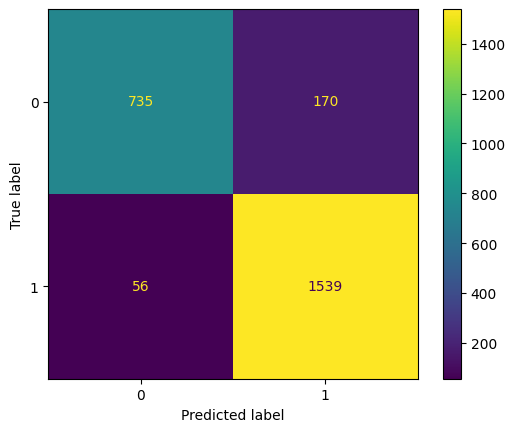

In [57]:
#confusion for Random forest
print(" Report for  %s : \n %s\n"
      % (rf_class, metrics.classification_report(y_test, predic_rf)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_rf)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score

rf_cv=cross_val_score(rf_class,x_train_sc,y_train,cv=5,scoring='f1_weighted')

rfcv=((str(rf_cv.mean().round(5)) + ' +/- '+str(rf_cv.std().round(5))))
print(rfcv)

0.89725 +/- 0.0087


#***ADA-Boosting***

#***Hyperparamter Tnuing***

In [59]:
from sklearn.ensemble import AdaBoostClassifier

hp_ab=AdaBoostClassifier()
hp_ab.get_params()


{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [60]:
grid_ab=[
    {
        'n_estimators':[1,100],
        'learning_rate':[1,100]
    }
]
grid_ab

[{'n_estimators': [1, 100], 'learning_rate': [1, 100]}]

In [61]:
from sklearn.model_selection import GridSearchCV
ada_grid=GridSearchCV(AdaBoostClassifier(),param_grid=grid_ab,cv=5)
ada_grid.fit(x_train_sc,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight 

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': [1, 100], 'n_estimators': [1, 100]}])

In [62]:
print(ada_grid.best_params_)
print(ada_grid.best_estimator_)
print(ada_grid.best_score_)

{'learning_rate': 1, 'n_estimators': 100}
AdaBoostClassifier(learning_rate=1, n_estimators=100)
0.8434666666666668


In [63]:
cv_res_ada=ada_grid.cv_results_
for i in cv_res_ada:
  print(i)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_learning_rate
param_n_estimators
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [64]:
for mean_score,std_score,rank_score in zip(cv_res_ada['mean_test_score'],cv_res_ada['std_test_score'],cv_res_ada['rank_test_score']):
  print(mean_score,std_score,rank_score)


0.6709333333333334 0.007666376806114714 2
0.8434666666666668 0.005323323940713891 1
0.6709333333333334 0.007666376806114714 2
0.3349333333333334 0.015541199724888956 4


In [65]:
#AdaBoost
from sklearn.tree import DecisionTreeClassifier

ada_class=AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=1, n_estimators=100)
ada_class.fit(x_train_sc,y_train)
predic_ada=ada_class.predict(x_test_sc)
ada_accu=ada_class.score(x_test_sc,y_test)
print("The Accuray of Ada Boosting without any depth fixed (numb of trees) : ",ada_accu)
print("predicted values : ", predic_ada)

The Accuray of Ada Boosting without any depth fixed (numb of trees) :  0.8524
predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [66]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for ADA-Boost : %.3f' %precision_score(y_true=y_test,y_pred=predic_ada))
print('Recall score for ADA-Boost : %.3f' %recall_score(y_true=y_test,y_pred=predic_ada))
print('F1 Score for ADA-Boost : %.3f' %f1_score(y_true=y_test,y_pred=predic_ada))
f1_7=(f1_score(y_true=y_test,y_pred=predic_ada)).round(3)

Precision score for ADA-Boost : 0.893
Recall score for ADA-Boost : 0.873
F1 Score for ADA-Boost : 0.883


 Report for  AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100):
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       905
           1       0.89      0.87      0.88      1595

    accuracy                           0.85      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.85      0.85      0.85      2500




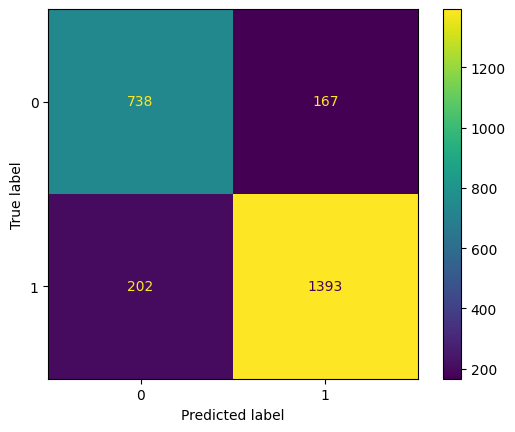

In [67]:
#confusion for Ada-Boosting
print(" Report for  %s:\n%s\n"
      % (ada_class, metrics.classification_report(y_test, predic_ada)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_ada)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score

ada_cv=cross_val_score(ada_class,x_train_sc,y_train,cv=5,scoring='f1_weighted')

adacv=((str(ada_cv.mean().round(5)) + ' +/- '+str(ada_cv.std().round(5))))
print(adacv)

0.83862 +/- 0.00859


#***Gradient***

#***Hyperparamter tuning***

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

hp_g=GradientBoostingClassifier()
hp_g.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [70]:
hp_g_grid=[
    {
        'max_depth':[1,100],
        'n_estimators':[1,100],
        'learning_rate':[1,100]
    }
]
hp_g_grid

[{'max_depth': [1, 100], 'n_estimators': [1, 100], 'learning_rate': [1, 100]}]

In [71]:
gd_grid=GridSearchCV(GradientBoostingClassifier(),param_grid=hp_g_grid,cv=5)
gd_grid.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [1, 100], 'max_depth': [1, 100],
                          'n_estimators': [1, 100]}])

In [72]:
print(gd_grid.best_params_)
print(gd_grid.best_estimator_)
print(gd_grid.best_score_)

{'learning_rate': 1, 'max_depth': 100, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=1, max_depth=100)
0.8473333333333335


In [73]:
cv_res_gd=gd_grid.cv_results_
for i in cv_res_gd:
  print(i)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_learning_rate
param_max_depth
param_n_estimators
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [74]:
for mean_score,std_score,rank_score in zip(cv_res_gd['mean_test_score'],cv_res_gd['std_test_score'],cv_res_gd['rank_test_score']):
  print(mean_score,std_score,rank_score)

0.6709333333333334 0.007666376806114714 6
0.8440000000000001 0.00415264306730599 2
0.8416 0.009748846085563147 3
0.8473333333333335 0.009247221805013155 1
0.6709333333333334 0.007666376806114714 6
0.32880000000000004 0.007488064577119453 8
0.8400000000000001 0.009266426855410148 5
0.8414666666666667 0.012324501342177434 4


In [75]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_class=GradientBoostingClassifier(learning_rate=1, max_depth=100,n_estimators=100)
gb_class.fit(x_train_sc,y_train)
predic_gb=gb_class.predict(x_test_sc)
gb_accu=gb_class.score(x_test_sc,y_test)
print("The accuray of Gradient boosting without fixing values of max depth (num of trees) : " ,gb_accu)
print("predicted values : " , predic_gb)

The accuray of Gradient boosting without fixing values of max depth (num of trees) :  0.8588
predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [76]:
#precision, recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for Gradient  : %.3f' %precision_score(y_true=y_test,y_pred=predic_gb))
print('Recall score for Gradient : %.3f' %recall_score(y_true=y_test,y_pred=predic_gb))
print('F1 Score for Gradient : %.3f' %f1_score(y_true=y_test,y_pred=predic_gb))
f1_8=(f1_score(y_true=y_test,y_pred=predic_gb)).round(3)

Precision score for Gradient  : 0.896
Recall score for Gradient : 0.882
F1 Score for Gradient : 0.888


 Report for  GradientBoostingClassifier(learning_rate=1, max_depth=100):
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       905
           1       0.90      0.88      0.89      1595

    accuracy                           0.86      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.86      0.86      0.86      2500




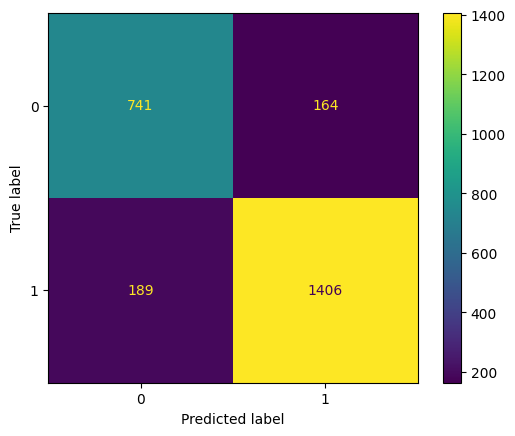

In [77]:
#confusion for
from sklearn.metrics import classification_report

print(" Report for  %s:\n%s\n"
      % (gb_class, classification_report(y_test, predic_gb)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_gb)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

In [104]:
from sklearn.model_selection import cross_val_score

gb_cv=cross_val_score(gb_class,x_train_sc,y_train,cv=5,scoring='f1_weighted')

gbcv=((str(gb_cv.mean().round(5)) + ' +/- '+str(gb_cv.std().round(5))))
print(gbcv)

0.84673 +/- 0.011


#***F1 Values Of All Models***

In [135]:
from tabulate import tabulate

# Sample data (replace with your actual F1 scores)
model =[ "SVM rbf",  "Decision tree","Random forest","Ada-boost","Gradient Boost","Logistic Regression (no hyperparamter tuning)",]

f1valu = [f1_2,f1_5,f1_6,f1_7,f1_8,f1_1]

# Create a dictionary for the data
data = {"Model Used": model, "F1 Score": f1valu}

# Print the table with formatting using tabulate library
print(tabulate(data, headers="keys", tablefmt="fancy_grid"))


╒═══════════════════════════════════════════════╤════════════╕
│ Model Used                                    │   F1 Score │
╞═══════════════════════════════════════════════╪════════════╡
│ SVM rbf                                       │      0.845 │
├───────────────────────────────────────────────┼────────────┤
│ Decision tree                                 │      0.895 │
├───────────────────────────────────────────────┼────────────┤
│ Random forest                                 │      0.932 │
├───────────────────────────────────────────────┼────────────┤
│ Ada-boost                                     │      0.883 │
├───────────────────────────────────────────────┼────────────┤
│ Gradient Boost                                │      0.888 │
├───────────────────────────────────────────────┼────────────┤
│ Logistic Regression (no hyperparamter tuning) │      0.86  │
╘═══════════════════════════════════════════════╧════════════╛


The model with the highest value is Random Forest

Random Forest : Will be trained using PCA data where the dimensions has ben reduced from 12 to 6(50% of 12)

# **PCA DATA**

In [138]:
rf_class=RandomForestClassifier(max_depth=100, max_leaf_nodes=100,n_estimators=100)
rf_class.fit(x_train_pca,y_train)
predic_rf=rf_class.predict(x_test_pca)
rf_accu=rf_class.score(x_test_pca,y_test)
print("The accuray of Random forest  ",rf_accu)
print("predicted values : ", predic_rf)



from sklearn.metrics import precision_score , recall_score,f1_score
print('Precision score for Random forest(pca) : %.3f' %precision_score(y_true=y_test,y_pred=predic_rf))
print('Recall score for Random forest (pca): %.3f' %recall_score(y_true=y_test,y_pred=predic_rf))
print('F1 Score for Random forest (pca): %.3f' %f1_score(y_true=y_test,y_pred=predic_rf))



The accuray of Random forest   0.8068
predicted values :  [0 1 1 ... 1 1 1]
Precision score for Random forest(pca) : 0.817
Recall score for Random forest (pca): 0.898
F1 Score for Random forest (pca): 0.856


In [137]:
from sklearn.model_selection import cross_val_score

svm_pca_cv=cross_val_score(classi_pca,x_train_sc,y_train,cv=5,scoring='f1_weighted')

svmcv=((str(svm_pca_cv.mean().round(5)) + ' +/- '+str(svm_pca_cv.std().round(5))))
print(svmcv)

0.94538 +/- 0.00402


# **Feature Selection**

PCA(principal component analysis)
Dimensionality Reduction

In [82]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(x)
x_pca=pca.transform(x)
print(x_pca.shape)

(10000, 6)


# **SelectPercentile**

In [83]:
from sklearn.feature_selection import SelectPercentile,f_classif
percentile_sel=SelectPercentile(f_classif,percentile=50)

x_50=percentile_sel.fit_transform(x,y)
print(x_50.shape)

(10000, 6)


In [84]:
percentile_sel.get_feature_names_out()

array(['tau1', 'tau2', 'tau3', 'tau4', 'g2', 'g3'], dtype=object)

In [85]:
#Giving values for the x set
xp=ds_egssd.drop(columns=["stab","stabf","tau4","p1","p2","p3","p4","g1","g4"])
xp.head()

,tau1,tau2,tau3,g2,g3
0,2.959060,3.079885,8.381025,0.859578,0.887445
1,9.304097,4.902524,3.047541,0.862414,0.562139
2,8.971707,8.848428,3.046479,0.766689,0.839444
3,0.716415,7.669600,4.486641,0.976744,0.929381
4,3.134112,7.608772,4.943759,0.455450,0.656947


In [86]:
# We now split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train_ps, x_test_ps, y_train_ps, y_test_ps = train_test_split(xp, y, test_size = 0.25, stratify=y, random_state=42)

In [139]:
rf_class=RandomForestClassifier(max_depth=100, max_leaf_nodes=100,n_estimators=100)
rf_class.fit(x_train_ps,y_train_ps)
predic_rf=rf_class.predict(x_test_ps)
rf_accu=rf_class.score(x_test_ps,y_test_ps)
print("The accuray of Random forest  ",rf_accu)
print("predicted values : ", predic_rf)



from sklearn.metrics import precision_score , recall_score,f1_score
print('Precision score for Random forest(pca) : %.3f' %precision_score(y_true=y_test,y_pred=predic_rf))
print('Recall score for Random forest (pca): %.3f' %recall_score(y_true=y_test,y_pred=predic_rf))
print('F1 Score for Random forest (pca): %.3f' %f1_score(y_true=y_test,y_pred=predic_rf))



The accuray of Random forest   0.7948
predicted values :  [0 1 1 ... 1 1 1]
Precision score for Random forest(pca) : 0.821
Recall score for Random forest (pca): 0.867
F1 Score for Random forest (pca): 0.844


# **tNSE**

In [88]:
X=ds_egssd.drop(columns=["stab","stabf"])
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [89]:

le=LabelEncoder()
Y=le.fit_transform(ds_egssd["stabf"])

print(Y)
print(type(Y))

print(le.classes_)


[1 0 1 ... 0 1 1]
<class 'numpy.ndarray'>
['stable' 'unstable']


In [90]:
from sklearn.manifold import TSNE
tsne_projection=TSNE(n_components=2,init='pca',learning_rate='auto')
X_tnse_trained_model=tsne_projection.fit_transform(X)
print("Number of samples : ",X_tnse_trained_model.shape)

Number of samples :  (10000, 2)


In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=42)


(7500, 2)


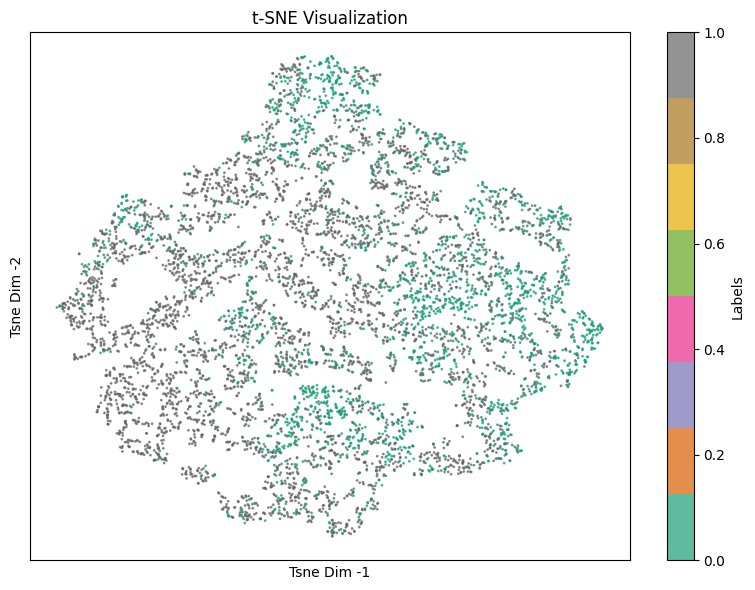

In [131]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tnse2d=TSNE(n_components=2,init='pca',learning_rate='auto')
xtrain2d=tnse2d.fit_transform(X_train)
print(xtrain2d.shape)

plt.figure(figsize=(8,6))
scatter=plt.scatter(xtrain2d[:,0],xtrain2d[:,1],c=y_train,s=1,alpha=0.7,cmap='Dark2')

plt.colorbar(scatter,label='Labels')
plt.xlabel("Tsne Dim -1")
plt.ylabel("Tsne Dim -2")
plt.title("t-SNE Visualization")


plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.grid(False)
plt.tight_layout()
plt.show()


# **Results**

In [140]:
import random
from tabulate import tabulate  # Import the tabulate function
model_names=['Svm Rbf','Decision Tree','Random Forest','Ada Boosting','Gradient Boosting','Logistic Regression']

values_std=[0.966,0.881,0.944,0.882,0.946,0.86]
values_hpt=[f1_2,f1_5,f1_6,f1_7,f1_8,f1_1]
table=[]
for i in range(len(model_names)):
  table.append([model_names[i],values_std[i],values_hpt[i]])

headers=["Model Name","Standard","Hyperparameter Tuning"]
print(tabulate(table,headers,tablefmt="fancy_grid"))

╒═════════════════════╤════════════╤═════════════════════════╕
│ Model Name          │   Standard │   Hyperparameter Tuning │
╞═════════════════════╪════════════╪═════════════════════════╡
│ Svm Rbf             │      0.966 │                   0.845 │
├─────────────────────┼────────────┼─────────────────────────┤
│ Decision Tree       │      0.881 │                   0.895 │
├─────────────────────┼────────────┼─────────────────────────┤
│ Random Forest       │      0.944 │                   0.932 │
├─────────────────────┼────────────┼─────────────────────────┤
│ Ada Boosting        │      0.882 │                   0.883 │
├─────────────────────┼────────────┼─────────────────────────┤
│ Gradient Boosting   │      0.946 │                   0.888 │
├─────────────────────┼────────────┼─────────────────────────┤
│ Logistic Regression │      0.86  │                   0.86  │
╘═════════════════════╧════════════╧═════════════════════════╛


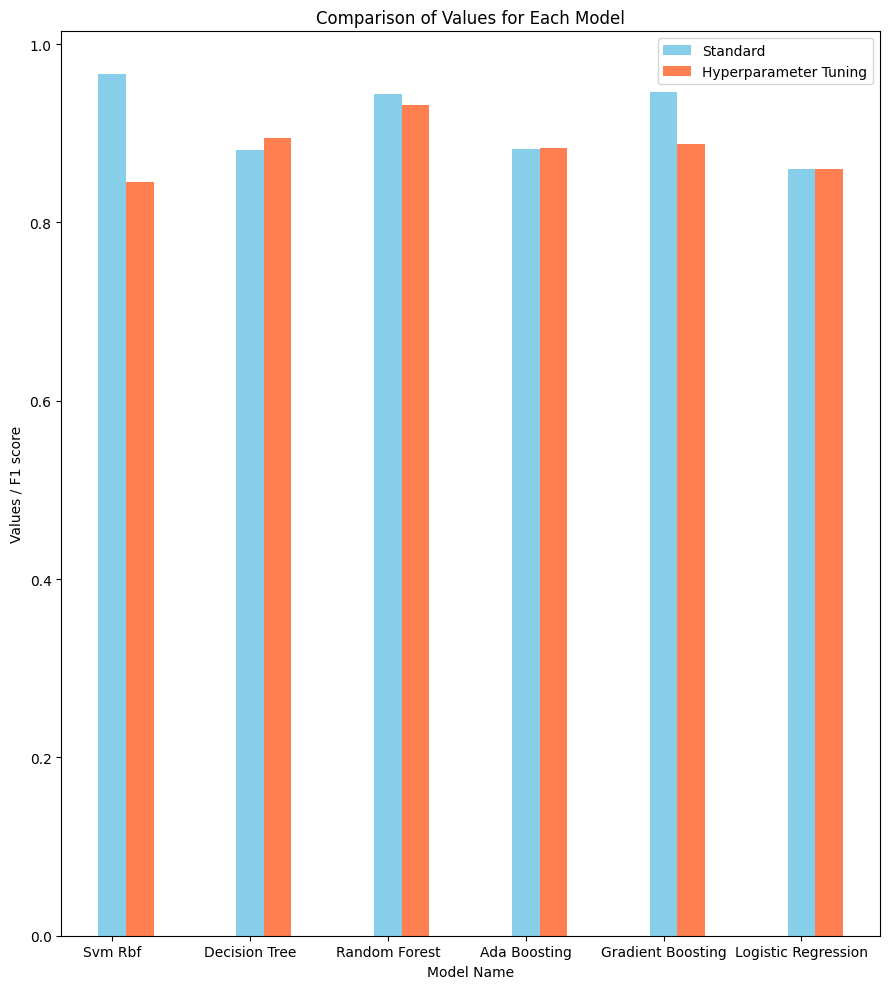

In [141]:

import matplotlib.pyplot as plt

name=['Svm Rbf','Decision Tree','Random Forest','Ada Boosting','Gradient Boosting','Logistic Regression']
value= [[0.966, f1_2],[0.881, f1_5],[0.944,f1_6],[0.882,f1_7],[0.946,f1_8],[0.86,f1_1]]

val1=[val[0] for val in value]
val2=[val[1]for val in value]
plt.figure(figsize=(9,10))
plt.bar(name,val1,width=0.2,label="Standard",color='skyblue')
plt.bar([i+0.2 for i in range(len(name))],val2,width=0.2,label="Hyperparameter Tuning",color='coral')
plt.xlabel("Model Name")
plt.ylabel("Values / F1 score")
plt.title("Comparison of Values for Each Model")
plt.legend()
plt.tight_layout()
plt.show()


